In [1]:
import tensorflow as tf

Loading MNIST dataset
Containing Training Samples = 60000, testing samples = 10000

Tesorflow already contain MNIST dataset which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist

After loading the MNIST data, Divide into train and Test datasets

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

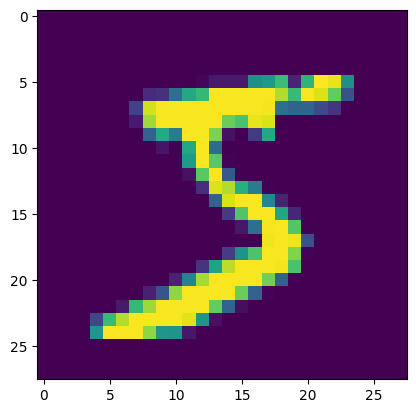

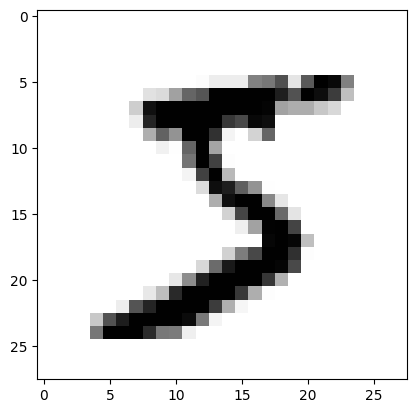

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

Checking The values of each pixel
Before normalisation

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

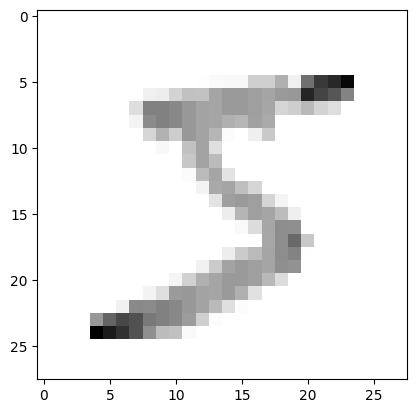

In [7]:
## you might have noticed that, its gray image and all values varies from 0 to 255
## in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

After Normalization

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0]) # just to check that we have labels inside our network

5


Resizing image to make it suitable for apply Convolution operation

In [10]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples Dimension", x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


Creating a Deep Neural Network

Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [12]:
model = Sequential()


## First convolution layer 0 1 2 3 (60000, 28,28,1)
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


## 2nd convolution layer 0 1 2 3 (60000, 28,28,1)
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## 3rd convolution layer 0 1 2 3 (60000, 28,28,1)
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### fully connected layer 0 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#second fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))

## Last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))
#


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Total Training Samples = ",len(x_trainr))


Total Training Samples =  60000


In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.7820 - loss: 0.6497 - val_accuracy: 0.9586 - val_loss: 0.1297
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9657 - loss: 0.1151 - val_accuracy: 0.9712 - val_loss: 0.0922
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 47ms/step - accuracy: 0.9754 - loss: 0.0790 - val_accuracy: 0.9792 - val_loss: 0.0731
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - accuracy: 0.9813 - loss: 0.0607 - val_accuracy: 0.9769 - val_loss: 0.0820
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9797 - val_loss: 0.0674


In [17]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples", test_loss)
print("validation Accuracy on 10,000 Test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9797 - loss: 0.0769
Test loss on 10,000 test samples 0.06673694401979446
validation Accuracy on 10,000 Test samples 0.9815999865531921


In [18]:
predictions = model.predict([x_testr])

 10/313 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [19]:
print(predictions)

[[5.1163496e-09 5.3927755e-07 1.0308236e-05 ... 9.9998802e-01
  1.8624833e-09 8.5074095e-07]
 [2.3904149e-04 4.4558110e-05 9.9964857e-01 ... 5.3493655e-05
  6.9759494e-07 7.0570991e-06]
 [1.1177879e-06 9.9999601e-01 4.4802192e-07 ... 6.5901264e-07
  3.5609208e-08 6.5349731e-08]
 ...
 [4.3715175e-08 2.0548185e-04 2.2885290e-07 ... 1.0130798e-06
  1.1453099e-05 1.9195347e-04]
 [9.2877208e-06 1.3861275e-07 8.1620000e-10 ... 5.6998015e-09
  4.0013154e-04 2.0936310e-05]
 [8.0911384e-05 1.1123639e-06 3.6988720e-05 ... 1.3409892e-06
  1.5390111e-04 1.0318396e-05]]


In [20]:
print(np.argmax(predictions[0]))

7


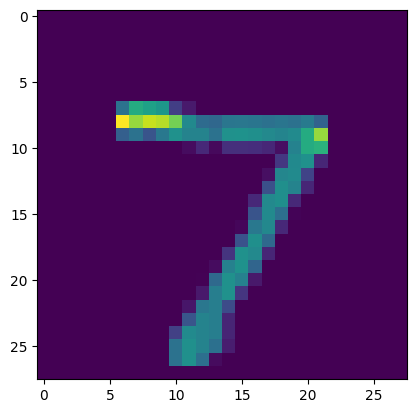

In [22]:
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predictions[128]))

8


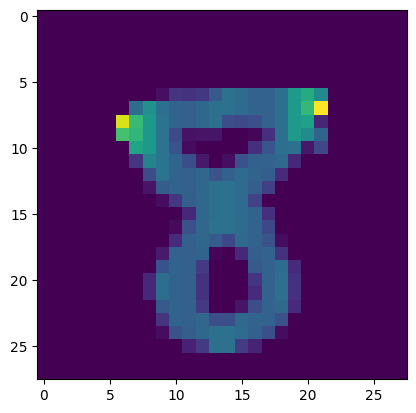

In [24]:
plt.imshow(x_test[128])

In [25]:
import cv2

In [43]:
img = cv2.imread('eight.jpg')

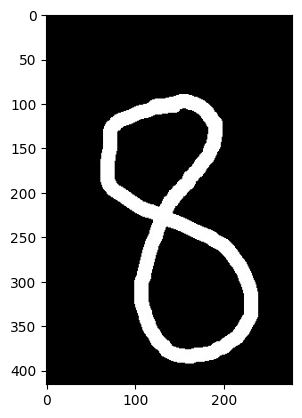

In [49]:
plt.imshow(img)

In [50]:
img.shape

(416, 277, 3)

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [53]:
resized = cv2.resize(gray,(28,28), interpolation= cv2.INTER_AREA)

In [54]:
resized.shape

(28, 28)

In [55]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [56]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [57]:
newimg.shape

(1, 28, 28, 1)

In [58]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [59]:
print(np.argmax(predictions))

8


In [60]:
import pickle

In [61]:

with open('handwritten.pkl', 'wb') as file:
    pickle.dump(model, file)